## 빅데이터 실습

### 타이타닉 생존자 상관분석
1. 상관계수로 두 변수의 상관관계를 유추
- correlation coefficient
2. 상관계수 값 (-1 ~ 0 ~ 1)
- 음수면 서로간의 음의 상관관계 (비례)
- 양수면 서로간의 양의 상관관계 (반비례)
    - `0.0 ~ 0.2` >> **서로간의 상관관계가 거의 없다**
    - `0.2 ~ 0.4` >> **서로간의 상관관계가 약간 있다**
    - `0.4 ~ 0.6` >> **서로간의 상관관계가 있다**
    - `0.6 ~ 0.8` >> **서로간의 상관관계가 강하게 있다**
    - `0.8 ~ 1.0` >> **서로간의 상관관계가 매우 긴밀하다**

#### 데이터 수집

##### Seaborn 테스트 데이터

In [1]:
## 필수 라이브러리 사용등록
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
# 한글 꺠짐문제 해결
from matplotlib import rc

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [4]:
sns.set_style('darkgrid')

In [18]:
# Seaborn에서 타이타닉 데이터 가져오기
dfTitanic = sns.load_dataset('titanic')
dfTitanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### 타이타닉 생존자 데이터 문제
- 결측치가 많음 >> 결측치 제거

In [19]:
dfTitanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### 결측치 확인
- age >> 177
- embarked >> 2
- deck >> 688
- embark_town >> 2      

##### 결측치를 채워넣는 방법
- DataFrame.describe()로 구해지는 기술통계값을 기준으로 채워넣는게 가장 일반적
1. 평균값으로 제거
2. 중앙값으로 제거
3. 최소값(min)으로 제거 - 해당 값이 데이터가 너무 없어서 통계내기 어렵기 때문
4. 최대값(max)으로 제거 - 대부분이 해당 값이므로 예측
5. 최빈값으로 제거 - 데이터 갯수가 가장 많은 값
6. ...etc

In [10]:
# age 중앙값 확인
dfTitanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# 조사결과 나이대는 20대 중후반이 가장 많음
# age 중앙값 구하기
ageMedian = dfTitanic['age'].median()

In [20]:
# 나이에 결측치를 중앙값(28)으로 채워넣기
dfTitanic['age'] = dfTitanic['age'].fillna(ageMedian)

In [21]:
# age >> Null값 0 확인 
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [22]:
# 정박항 결측치 최대값 확인
dfTitanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [23]:
# 정박항 결측치를 최대값(S)으로 채워넣기
dfTitanic['embarked'] = dfTitanic['embarked'].fillna('S')

In [25]:
# embarked >> Null값 0 확인 
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [26]:
# 승선도시 결측치 최대값 확인
dfTitanic['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [27]:
# 승선도시 결측치를 최대값(Southampton)으로 채워넣기
dfTitanic['embark_town'] = dfTitanic['embark_town'].fillna('Southampton')

In [29]:
# embark_town >> Null값 0 확인 
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [33]:
# deck 결측치 최대값 확인
dfTitanic['deck'].value_counts()

# >> C deck가 최대값이라 null값에 C를 넣을수 있을것 같지만, 각 데크 별로 빈도의 차이가 거의 없기 때문에 최선의 판단은 아님

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [34]:
# deck 결측치를 최대값(C)으로 채워넣기
dfTitanic['deck'] = dfTitanic['deck'].fillna('C')

In [35]:
# deck >> Null값 0 확인 
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [36]:
dfTitanic.to_excel('./data/타이타닉생존자_전처리완료.xlsx', index=False)

#### 시각화

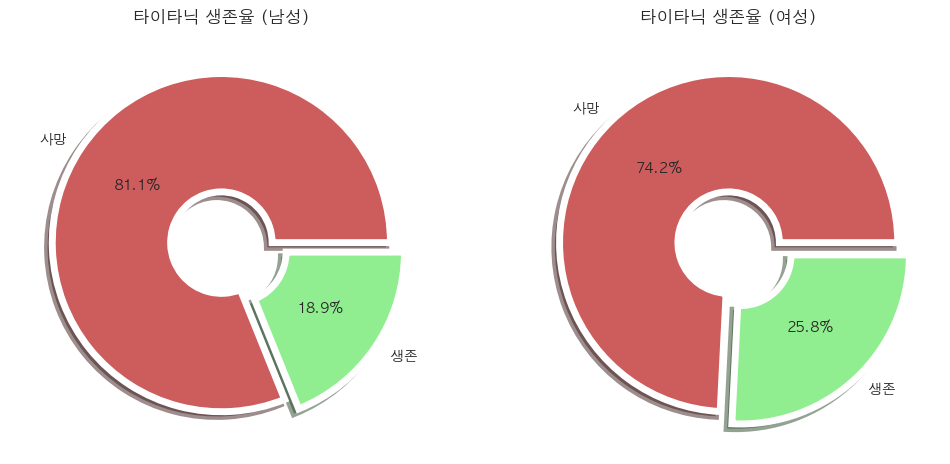

In [82]:
# 파이차트
f, ax = plt.subplots(1, 2, figsize=(12, 6))

malelabels = ['사망', '생존']
femalelabels = ['사망', '생존']
maleColor = ['indianred', 'lightGreen']
femaleColor = ['indianred', 'lightGreen']
wedgeProps = {'width': 0.7, 'edgecolor':'w', 'linewidth': 5}

# 각 서브플롯의 배경색을 검정색으로 설정
for axis in ax:
    axis.set_facecolor('black')

# Pandas의 DataFrame이나 시리즈는 matplotlib 차트로 그릴 수 있음
dfTitanic['survived'][dfTitanic['sex'] == 'male'].value_counts().plot.pie(ax=ax[0], 
                                                                          shadow=True, explode=[0, 0.1], autopct='%1.1f%%',
                                                                          labels=malelabels, colors=maleColor, wedgeprops=wedgeProps)
dfTitanic['survived'][dfTitanic['sex'] == 'female'].value_counts().plot.pie(ax=ax[1], 
                                                                            shadow=True, explode=[0, 0.1], autopct='%1.1f%%',
                                                                            labels=femalelabels, colors=femaleColor, wedgeprops=wedgeProps)

# 각 파이차트의 타이틀
ax[0].set_title('타이타닉 생존율 (남성)')
ax[1].set_title('타이타닉 생존율 (여성)')

# 축의 count 라벨 없애기
ax[0].set_axis_off()
ax[1].set_axis_off()

plt.show()

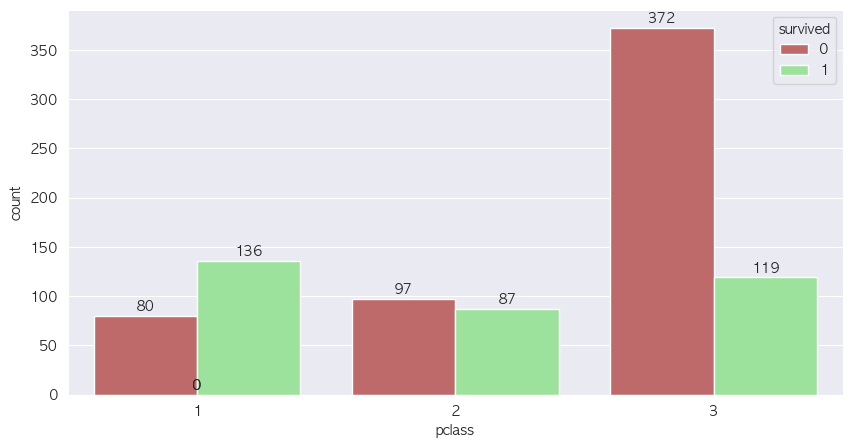

In [90]:
## 등급(pclass)별 생존자 수 bar 차트
plt.figure(figsize=(10, 5))
# stat='percent', 'count', 'proportion'...
ax = sns.countplot(dfTitanic, x='pclass', hue='survived', stat='count', palette=['indianred', 'lightGreen'])

# bar 갯수만큼 반복
for p in ax.patches : 
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height+5, int(height), ha='center', size=10)

plt.show()

#### 데이터 속성(변수)간 상관관계
- Pandas DataFrame에 corr() 함수사용

In [94]:
# 상관계수는 object, category는 적용불가
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [96]:
dfTitanic[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone']].corr(method='pearson')

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [107]:
# 각 두가지 속성끼리 상관관계 도출
dfTitanic['survived'].corr(dfTitanic['fare'])

0.2573065223849622

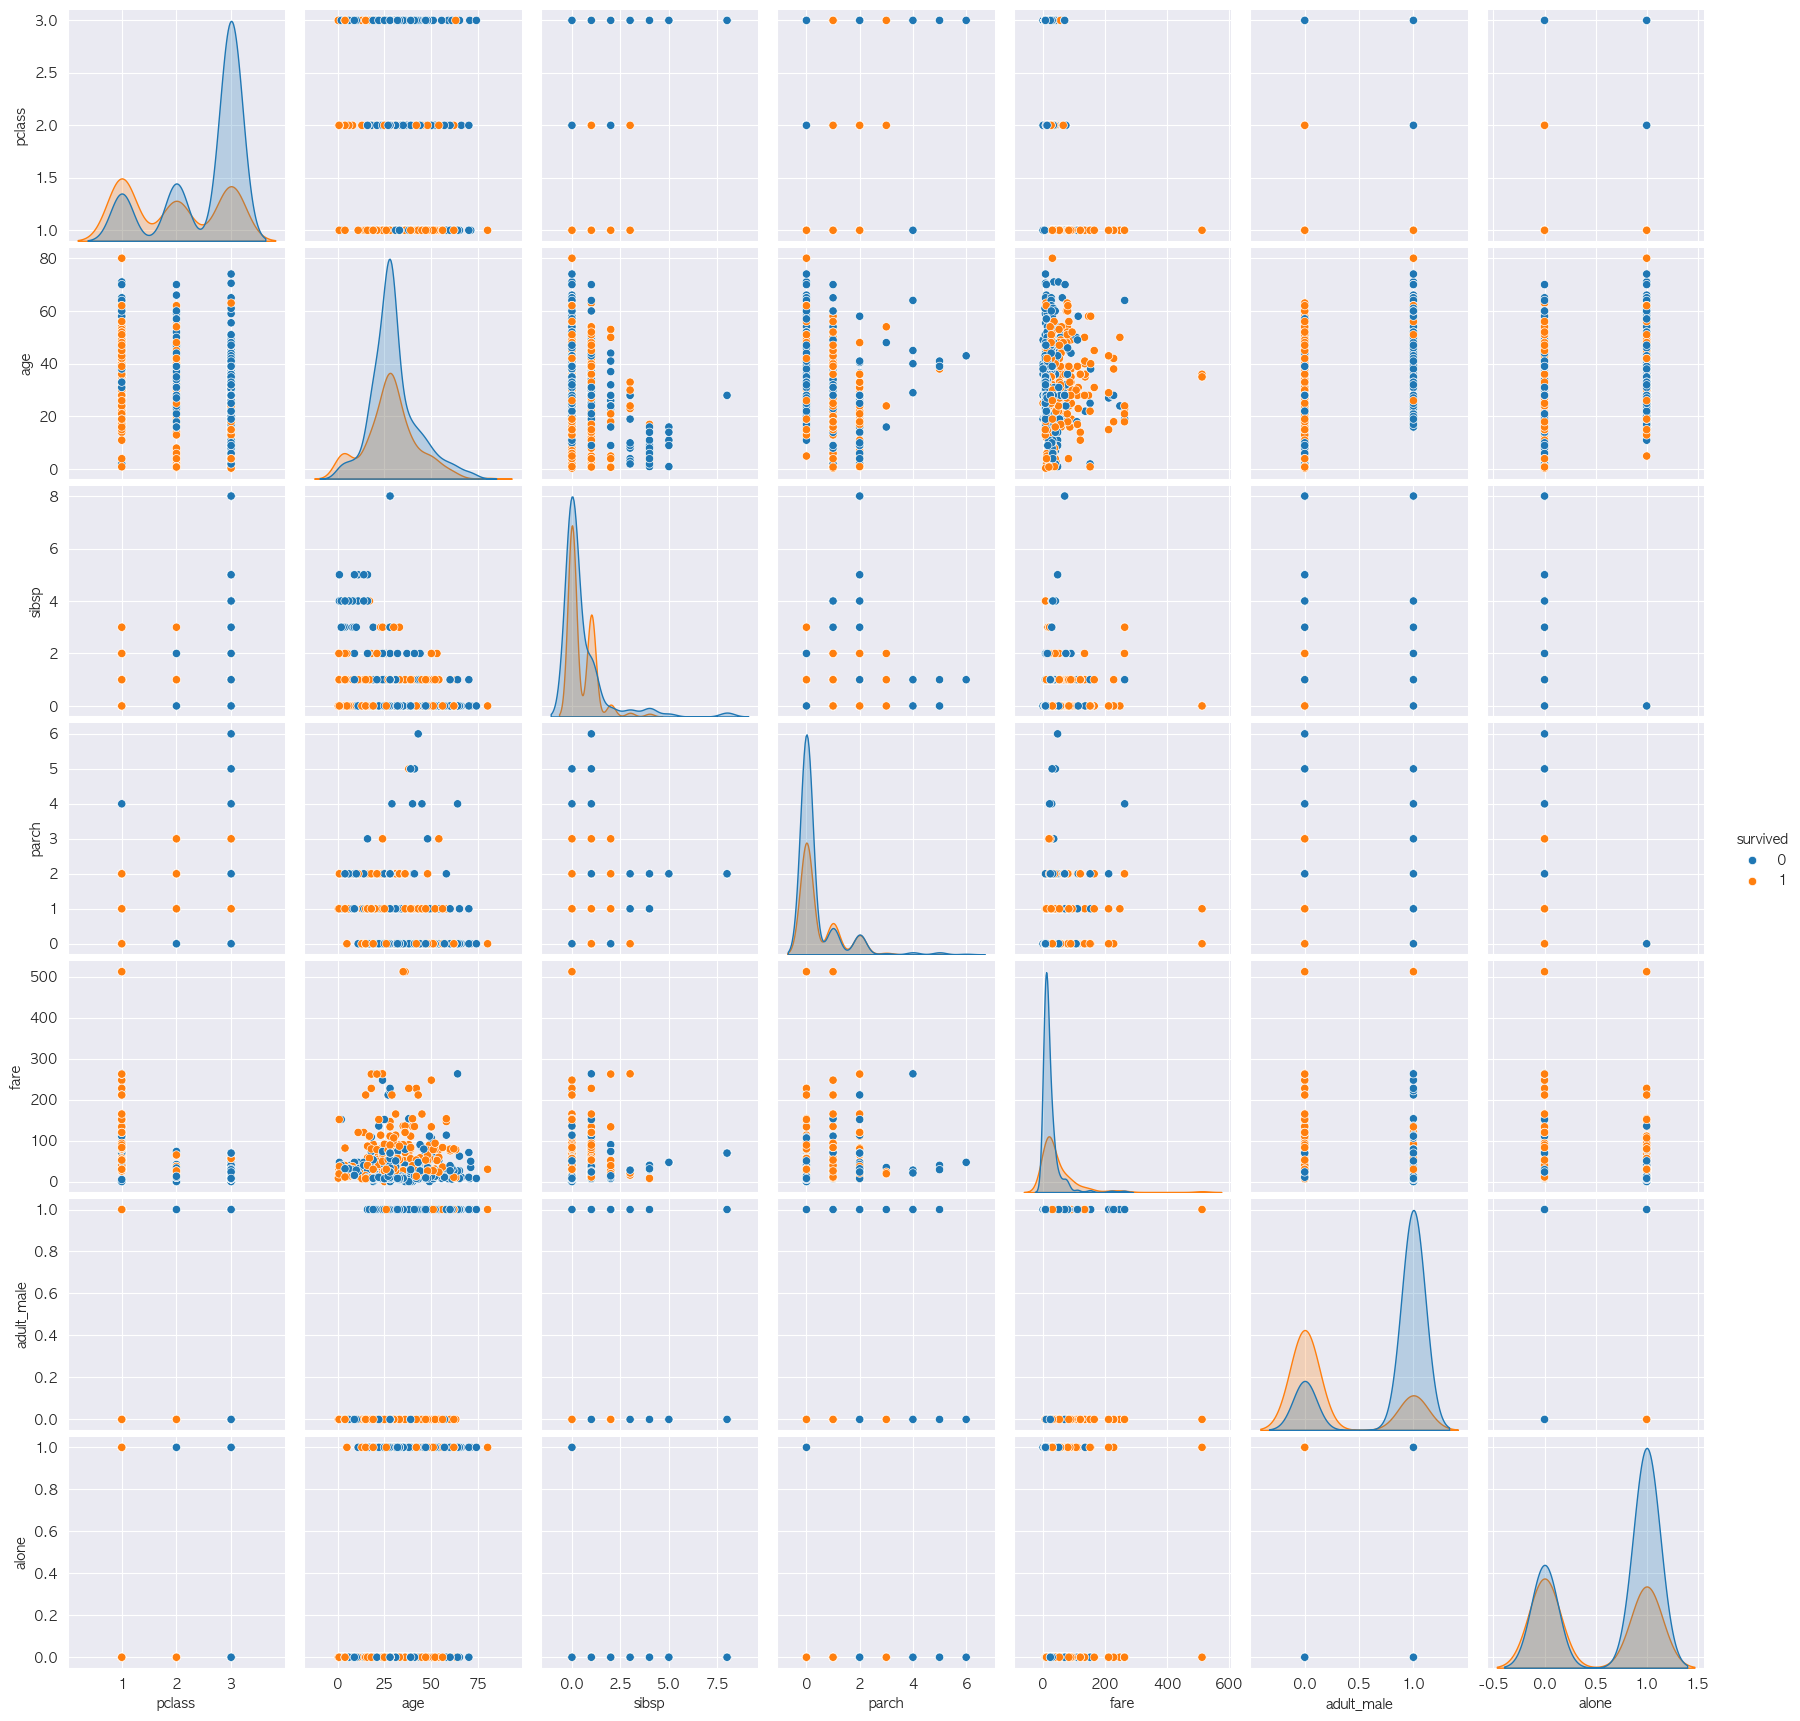

In [98]:
sns.pairplot(dfTitanic, hue='survived')

In [114]:
dfTitanic = pd.read_excel('./data/타이타닉생존자_전처리완료.xlsx')

In [115]:
## 상관관계를 히트맵 시각화
def categoryAge(x) :
    if x < 10 : return 0
    elif x < 20 : return 1
    elif x < 30 : return 2
    elif x < 40 : return 3
    elif x < 50 : return 4
    elif x < 60 : return 5
    elif x < 70 : return 6
    elif x < 80 : return 7
    else : return 8


In [116]:
# 히트맵에서 사용하기 위해 컬럼 재정의
dfTitanic['ageTwo'] = dfTitanic['age'].apply(categoryAge) # 컬럼의 값을 함수를 적용해서 값을 낼 수 있음
dfTitanic['sex'] = dfTitanic['sex'].map({'male': 1, 'female': 0}) # 여러번 수행하면 안됨
dfTitanic['family'] = dfTitanic['sibsp'] + dfTitanic['parch'] + 1

In [117]:
dfTitanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,ageTwo,family
886,0,2,1,27.0,0,0,13.00,S,Second,man,True,C,Southampton,no,True,2,1
887,1,1,0,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,1,1
888,0,3,0,28.0,1,2,23.45,S,Third,woman,False,C,Southampton,no,False,2,4
889,1,1,1,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,2,1
890,0,3,1,32.0,0,0,7.75,Q,Third,man,True,C,Queenstown,no,True,3,1


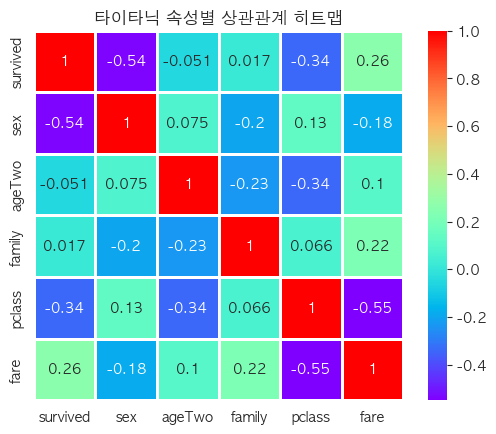

In [133]:
## 히트맵
hitMap = dfTitanic[['survived', 'sex', 'ageTwo', 'family', 'pclass', 'fare']]

## 속성정리
# square >> 각 히트탭 셀 정사각형
sns.heatmap(hitMap.astype(float).corr(), linewidths=1, square=True, cmap='rainbow', 
            annot=True, annot_kws={'size': 10}) # 칼라맵 종류 많음!!

plt.title('타이타닉 속성별 상관관계 히트맵')
plt.show()

1. 상관관계는 음의 관계, 양의 관계 모두 중요!! 절대값 0.4 ~ 1.0 사이의 값에 대한 속성간의 분석을 시작
2. 0.2 이하의 데이터는 분석대상에서 제외